In [1]:
#Importing the necessary Libraries

# linear algebra
import numpy as np 

import warnings
warnings.simplefilter("ignore")

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.stats import norm

# Algorithms
import six
import sys
sys.modules['sklearn.externals.six']=six
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import power_transform

from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold
from yellowbrick.classifier.rocauc import roc_auc
import pickle
import joblib

In [2]:
df = pd.read_csv("C:\DATATRAINED-BESTEDA\ALL-DATASET\DSData-master\DSData-master\loan_prediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Remarks: We see that there are missing values in our dataset. For missing values in categorical columns, we will fill them with mode; and for continuous columns we will fill them with mean.

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

## Feature Engineering

In [9]:
#getting the list of float data type column names

num_data = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        num_data.append(x)
print(f"\nContinuous Columns:\n", num_data)

#getting list of object data type column names
obj_data = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        obj_data.append(x)
print(f"Categorical Columns:\n", obj_data)


Continuous Columns:
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical Columns:
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [10]:
#Filling the missing values in categorical columns with mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

#filling the missing values in continuous columns with mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Remarks: In th above cell, we can see that there are no null values present in the dataset now.

In [12]:
df.drop("Loan_ID",axis=1, inplace=True)

In [13]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [14]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Statistical Analysis

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


Remarks:

count for all the columns are same, so, no data is missing.

mean is greater than median in ApplicantIncome, so data might be right skewed.

std is higher in ApplicantIncome and CoapplicantIncome, so, data might be spreaded.

Large difference between 75th percentile and max is present in ApplicantIncome and CoapplicantIncome. There might be some outliers.

## Exploratory Data Analysis(EDA)

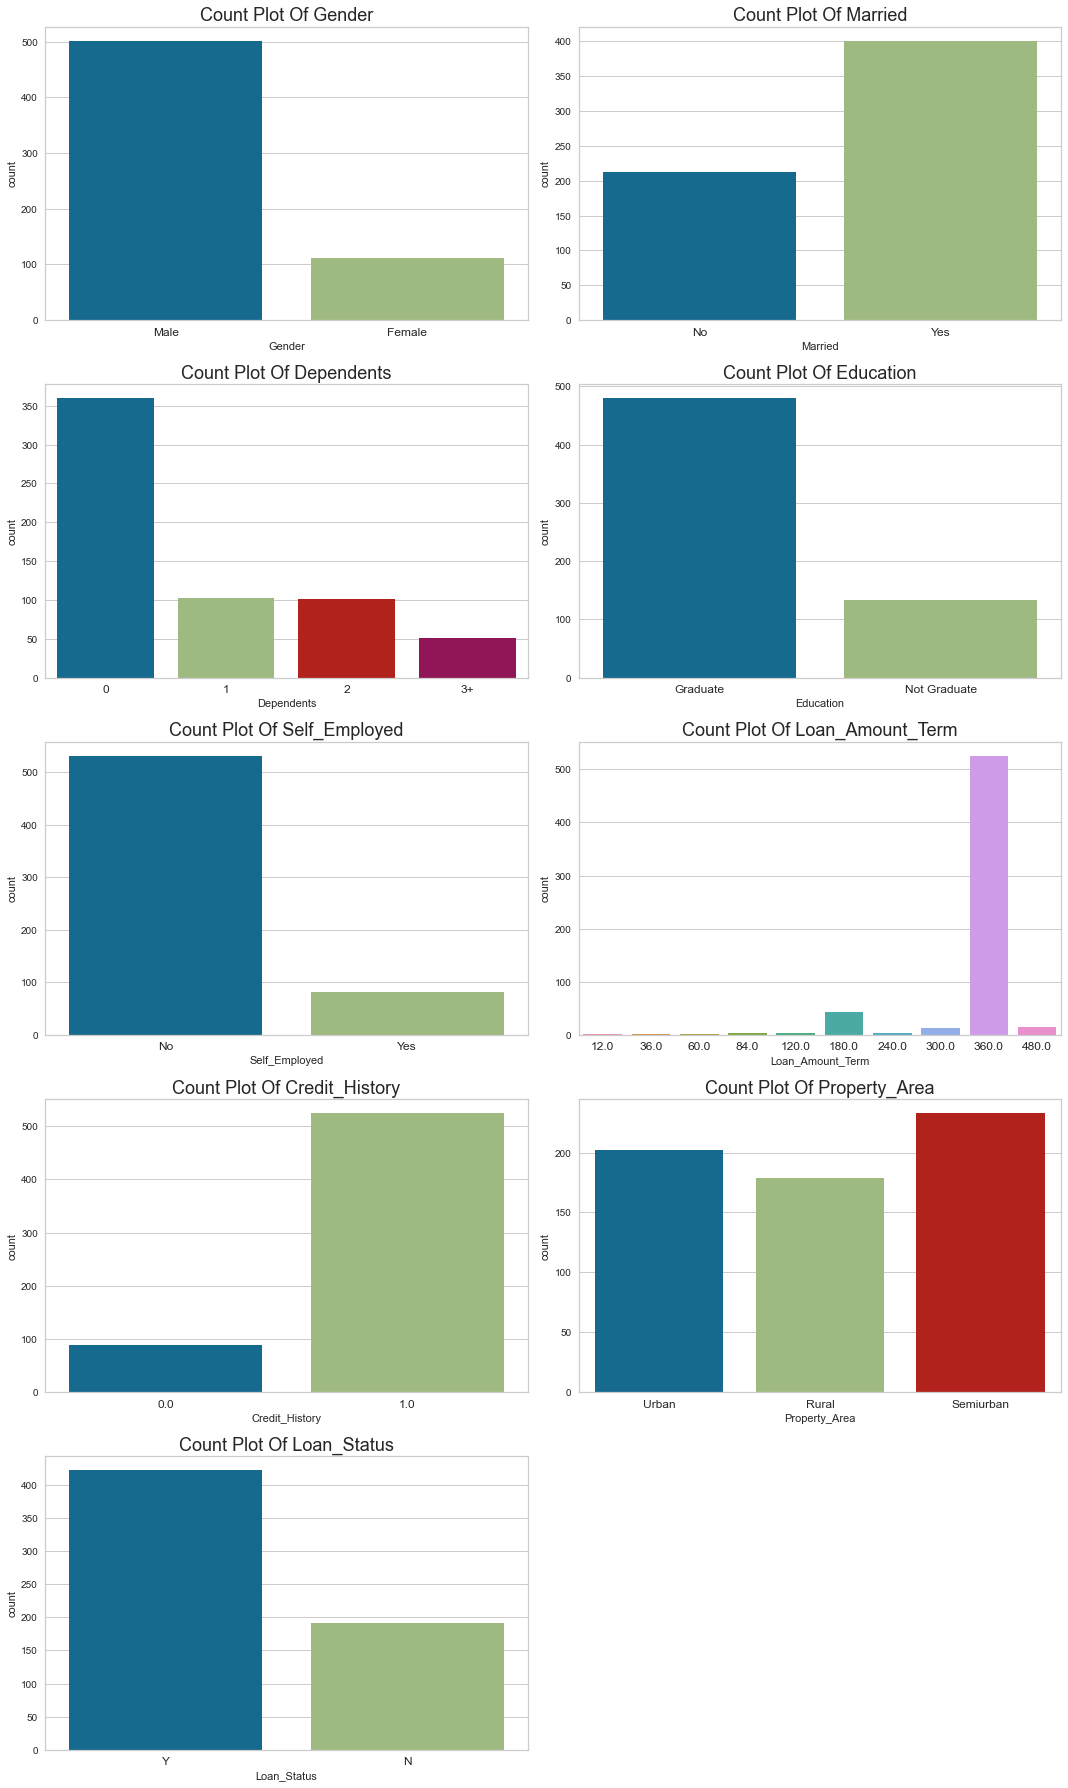

In [16]:
#Checking the countplots for the feature columns
col0=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term',
      'Credit_History','Property_Area','Loan_Status']

#plotting the plots
plt.figure(figsize=(15,25))
for i in range(len(col0)):
  plt.subplot(5,2,i+1)
  sns.countplot(df[col0[i]])
  plt.title(f"Count Plot Of {col0[i]}",fontsize=18)
  plt.xticks(fontsize=12)
  plt.tight_layout()

Observation:

From Gender, we can say the count of male is higher than female.

From married countplot,we can say there are more married people as compared to single.

From Countplot of dependents, we can say 0 has highest count and 3+ has the lowest count.

The countplot of Education shows that people who are graduated are having more and people who are not graduated have less count.

From Countplot of Self_employed, we see that people who are not self employed have high count as compare to self employed people.

From countplot of Loan_Amount_Term, 360 has the highest count.

Countplot of credit history shows 1 has high count and 0 has less count

From Countplot of property area, semi-urban has the highest count followed by Urban , and rural has least count.

From Countplot of loan_status, we see that Yes has higher count than NO.

Text(0.5, 1.0, 'Distribution of LoanAmount')

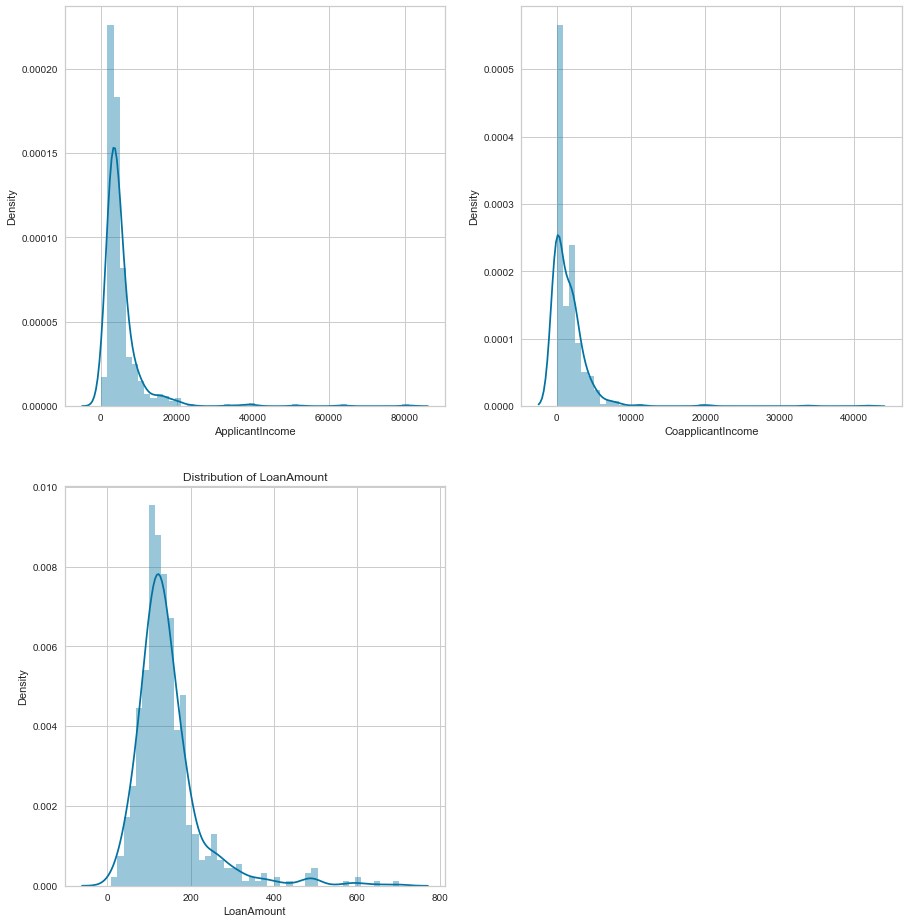

In [17]:
#Checking distribution plot 

col1=['ApplicantIncome','CoapplicantIncome','LoanAmount']
plt.figure(figsize=(15,25))
for i in range(len(col1)):
    plt.subplot(3,2,i+1)
    sns.distplot(df[col1[i]])
plt.title(f"Distribution of {col1[i]}")

Observation: From the above distplot, we can see that data has some skewness.

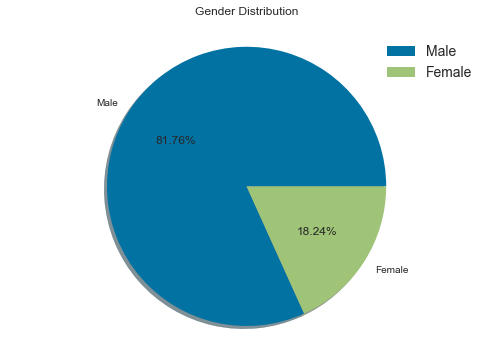

In [18]:
#checking pie-chart for feature columns
plt.figure(figsize=(7,5))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Gender Distribution\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: In the above pie chart, we can see that the number of males cover 81.76% of the rows in Gender column while females cover only 18.24% of rows.

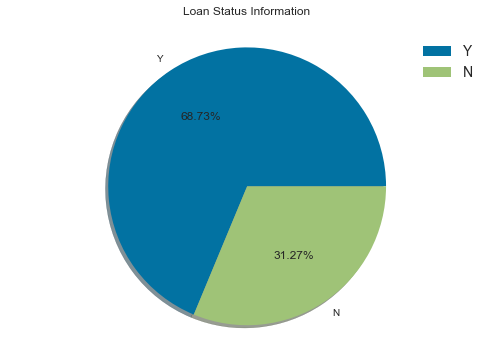

In [19]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(df['Loan_Status'].value_counts(), labels=df['Loan_Status'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Loan Status Information\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: In the above pie chart we see that our target label has 68.73% of loan approved status while 31.27% of loan rejected status. This indicates a class imbalance that we will treat before building our ML models.

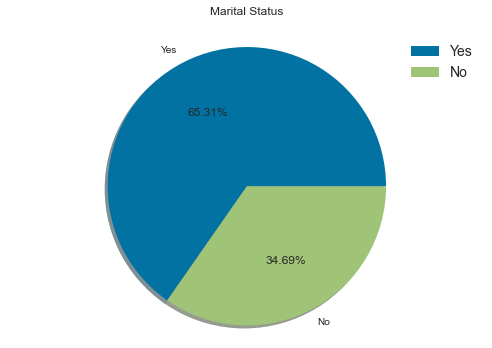

In [20]:
plt.figure(figsize=(7,5))
plt.pie(df['Married'].value_counts(), labels=df['Married'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Marital Status\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: In the above pie chart we can see that  married people occupy 65.31% of rows and the remaining 34.69% of rows are filled with unmarried people.

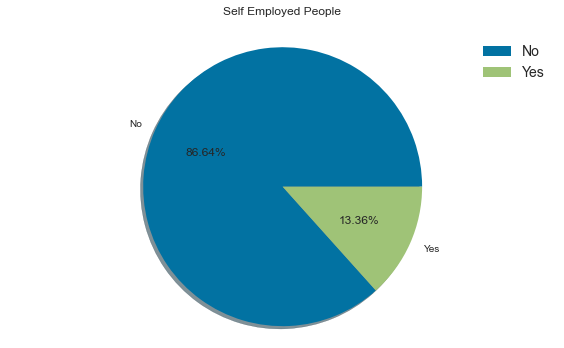

In [21]:
plt.figure(figsize=(8,5))
plt.pie(df['Self_Employed'].value_counts(), labels=df['Self_Employed'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Self Employed People\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: we see that 86.64% people are not self employed or might be working with either private or government sectors while only 13.36% people are self employed having their own business.

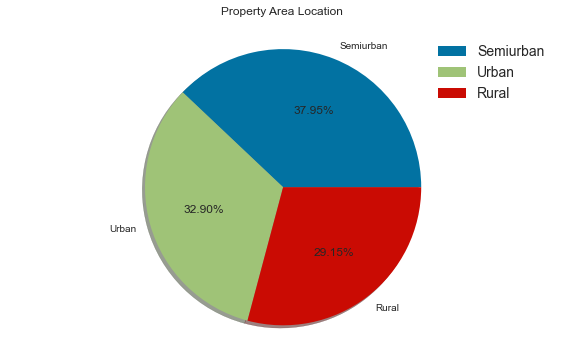

In [22]:
plt.figure(figsize=(8,5))
plt.pie(df['Property_Area'].value_counts(), labels=df['Property_Area'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Property Area Location\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: we see from the plot above that 37.95% rows are covered by semi urban area type, 32.90% rows are covered by urban area type and 29.15% rows are covered by rural area type.

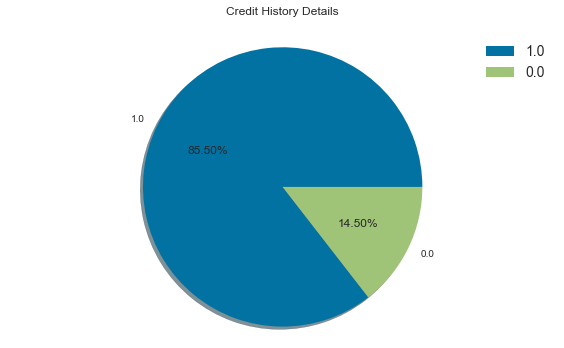

In [23]:
plt.figure(figsize=(8,5))
plt.pie(df['Credit_History'].value_counts(), labels=df['Credit_History'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Credit History Details\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: In the above pie chart we observe that 1.0 represent that credit history is available and 0.0 represent that credit history is not available. For 85.50% of people,we have the credit history information available while 14.50% people do not have any credit history.

plt.figure(figsize=(8,5))
plt.pie(df['Dependents'].value_counts(), labels=df['Dependents'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Information on number of Dependents\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

### Bivariate Analysis:

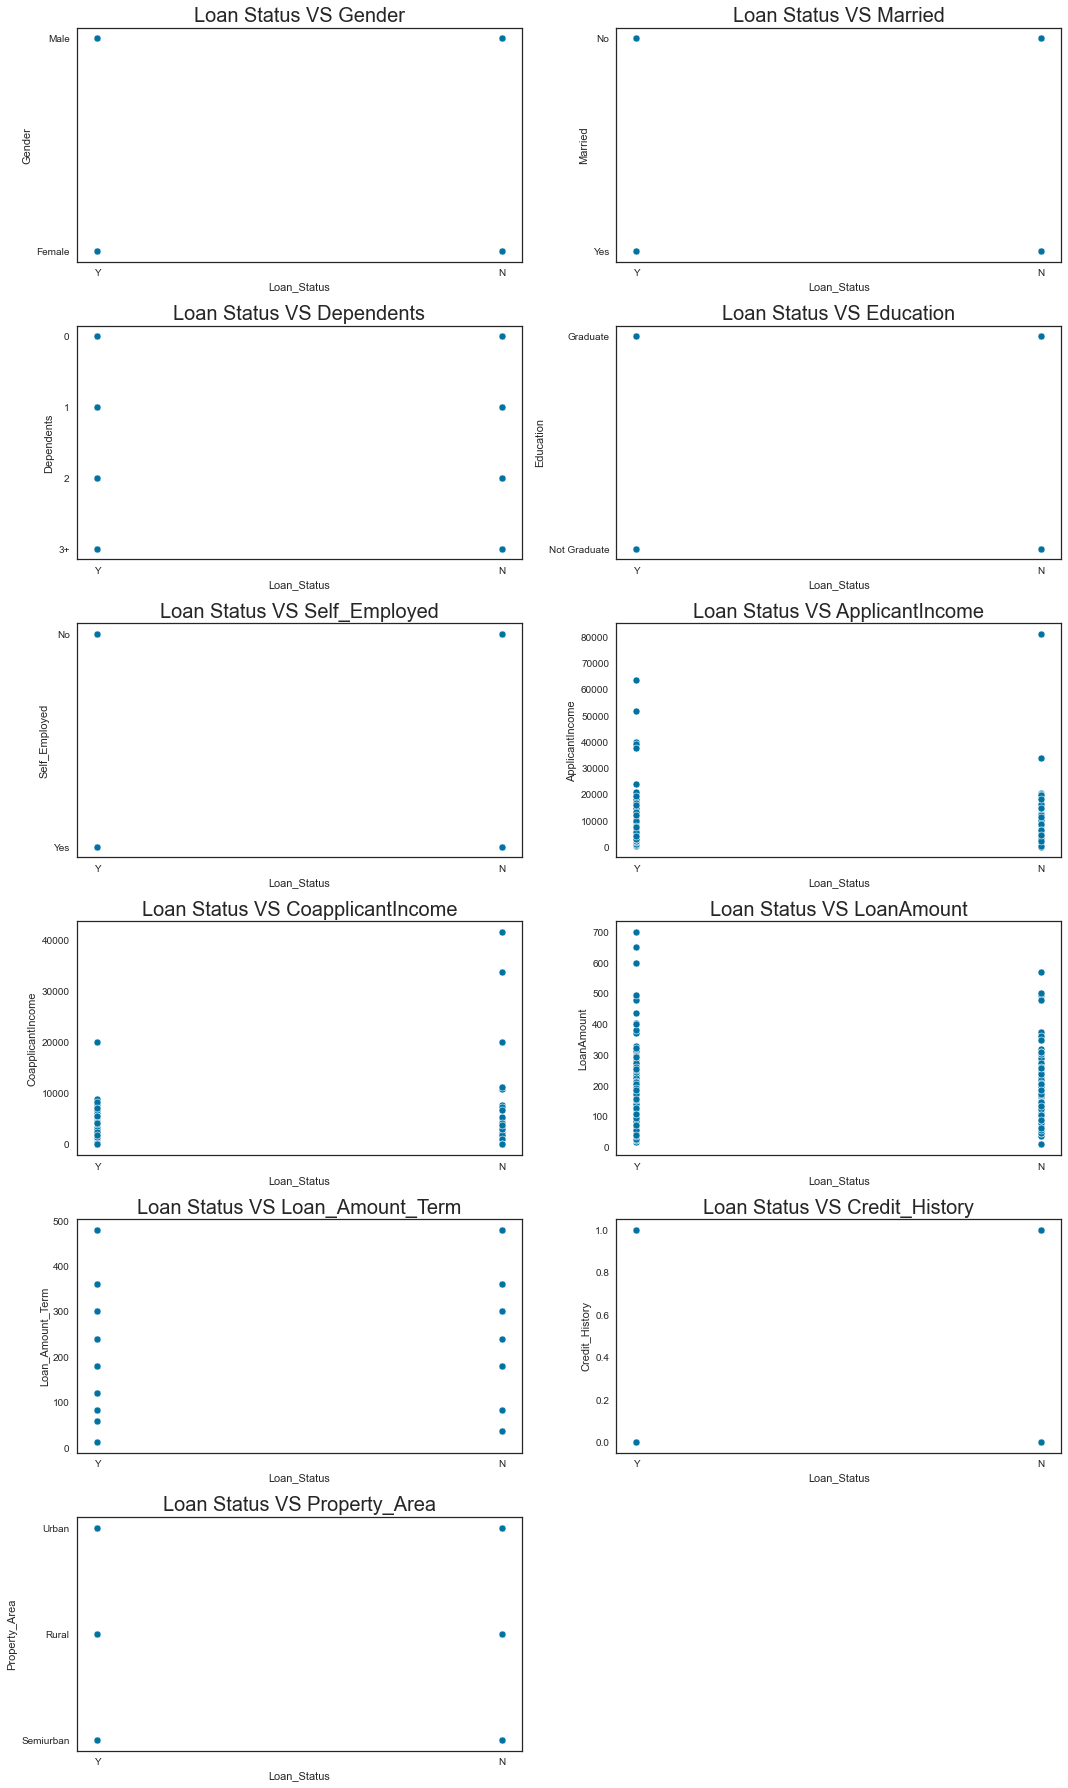

In [24]:
#checking the relationship between target column and other feature columns using scatterplot
col2=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

plt.figure(figsize=(15,25))
for i in range(len(col2)):
  plt.subplot(6,2,i+1)
  sns.scatterplot(x=df['Loan_Status'],y=df[col2[i]])
  plt.title(f"Loan Status VS {col2[i]}",fontsize=20)
  plt.tight_layout()

Observation:

1. From applicantincome and loan status, we see that people whose income is high take less loan and people earning less take more loans.

2. From coapplicantincome We can say there are more the people who dont want loan.

3. From loanamount we can say people with loan status Yes are high as compared to No loan.

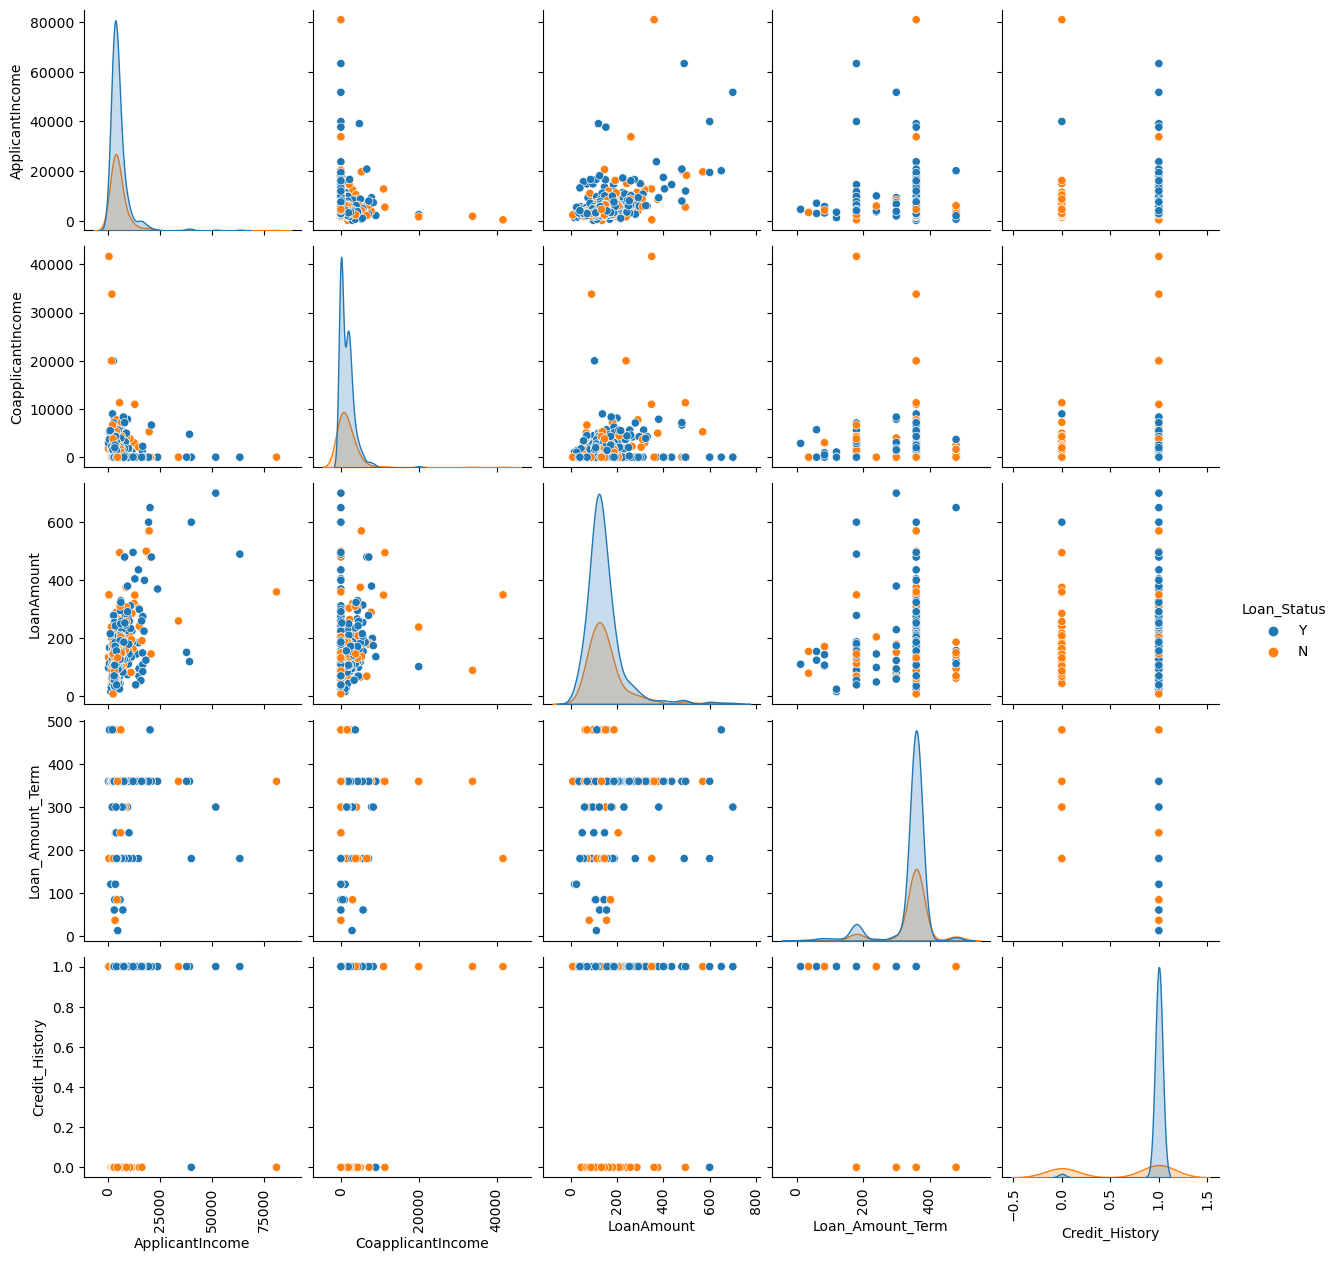

In [25]:
#Checking pairplot
plt.style.use('default')
g = sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

## Encoding:

Here we are using ordianalencoder since all the columns have values in order.

In [26]:
oe=OrdinalEncoder()
def ordinal_transform(df,column):
  df[column]=oe.fit_transform(df[column])
  return df

In [27]:
df=ordinal_transform(df,['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'])

In [28]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3+,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0
612,1.0,1.0,2,0.0,0.0,7583,0.0,187.000000,360.0,1.0,2.0,1.0


In [29]:
df['Dependents']=df['Dependents'].replace({'3+':'3'})

In [30]:
df['Dependents']=df['Dependents'].astype(int)

In [31]:
X=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [32]:
x=X

## Checking Outliers:

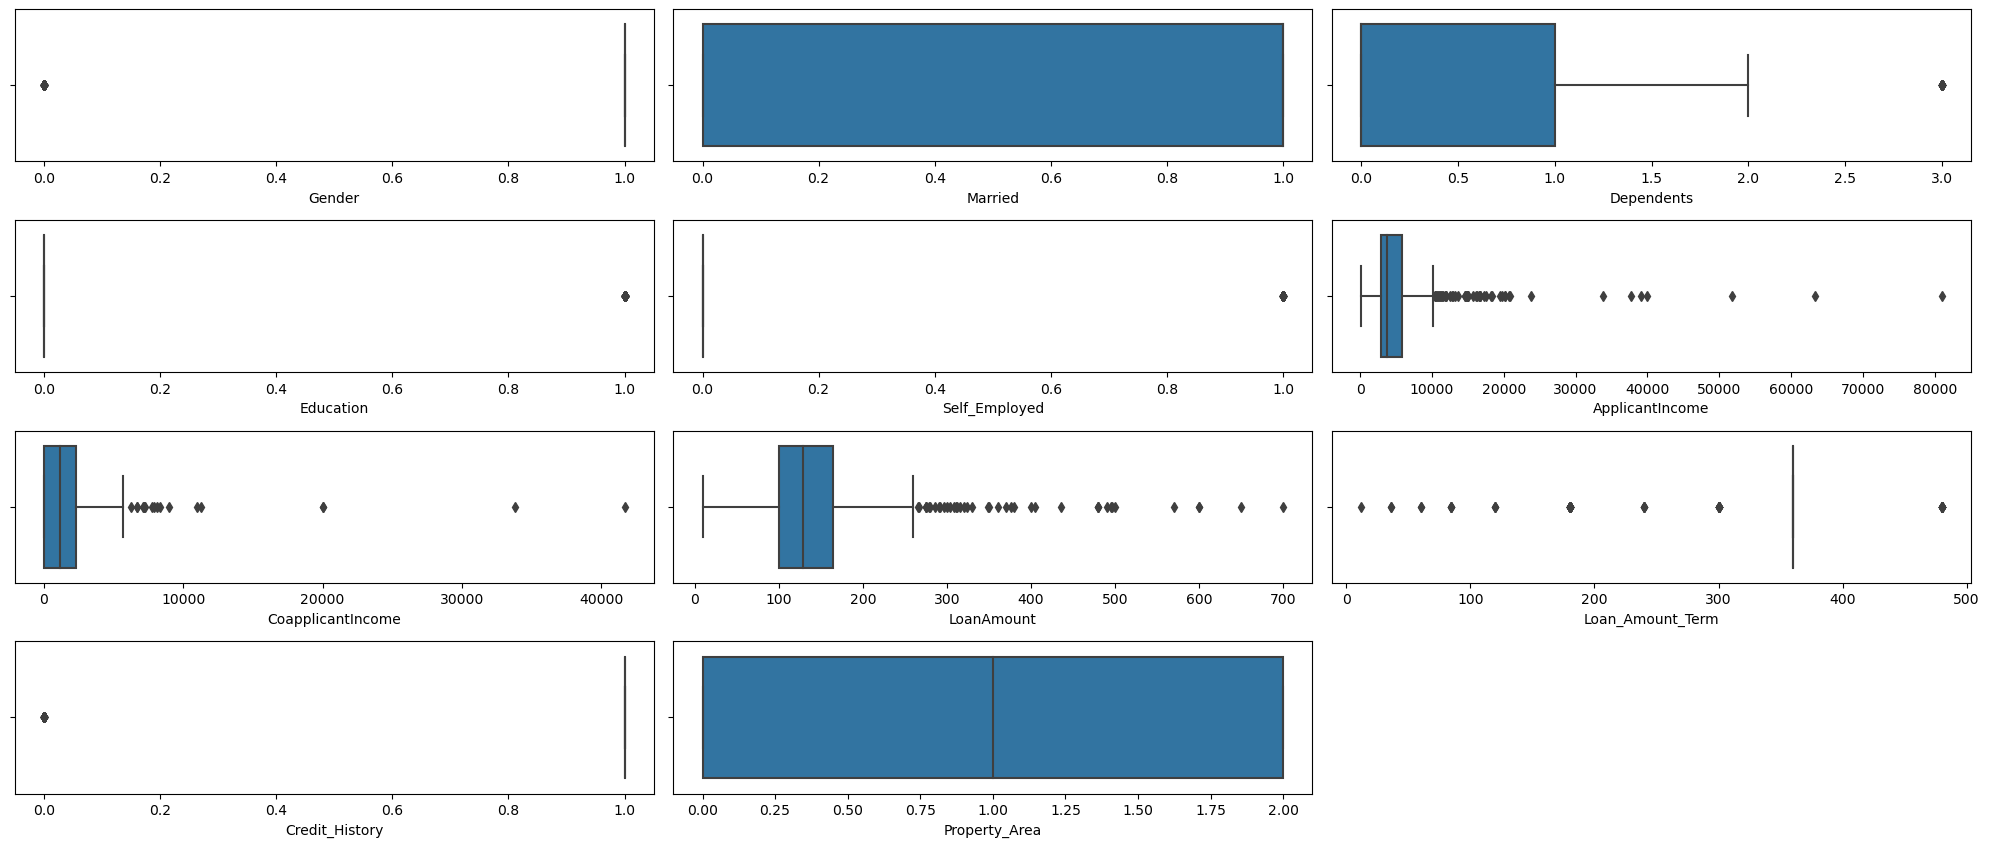

In [33]:
#checking outliers using boxplot
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(0,len(X_val)):
  plt.subplot(12,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

Remarks: We can see from the above plots that there are many outliers present.

In [34]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col] <=percentile[0]]=percentile[0]
  X[col][X[col] >=percentile[1]]=percentile[1]

Remarks: Here we used the percentile method to remove outliers without losing any data.

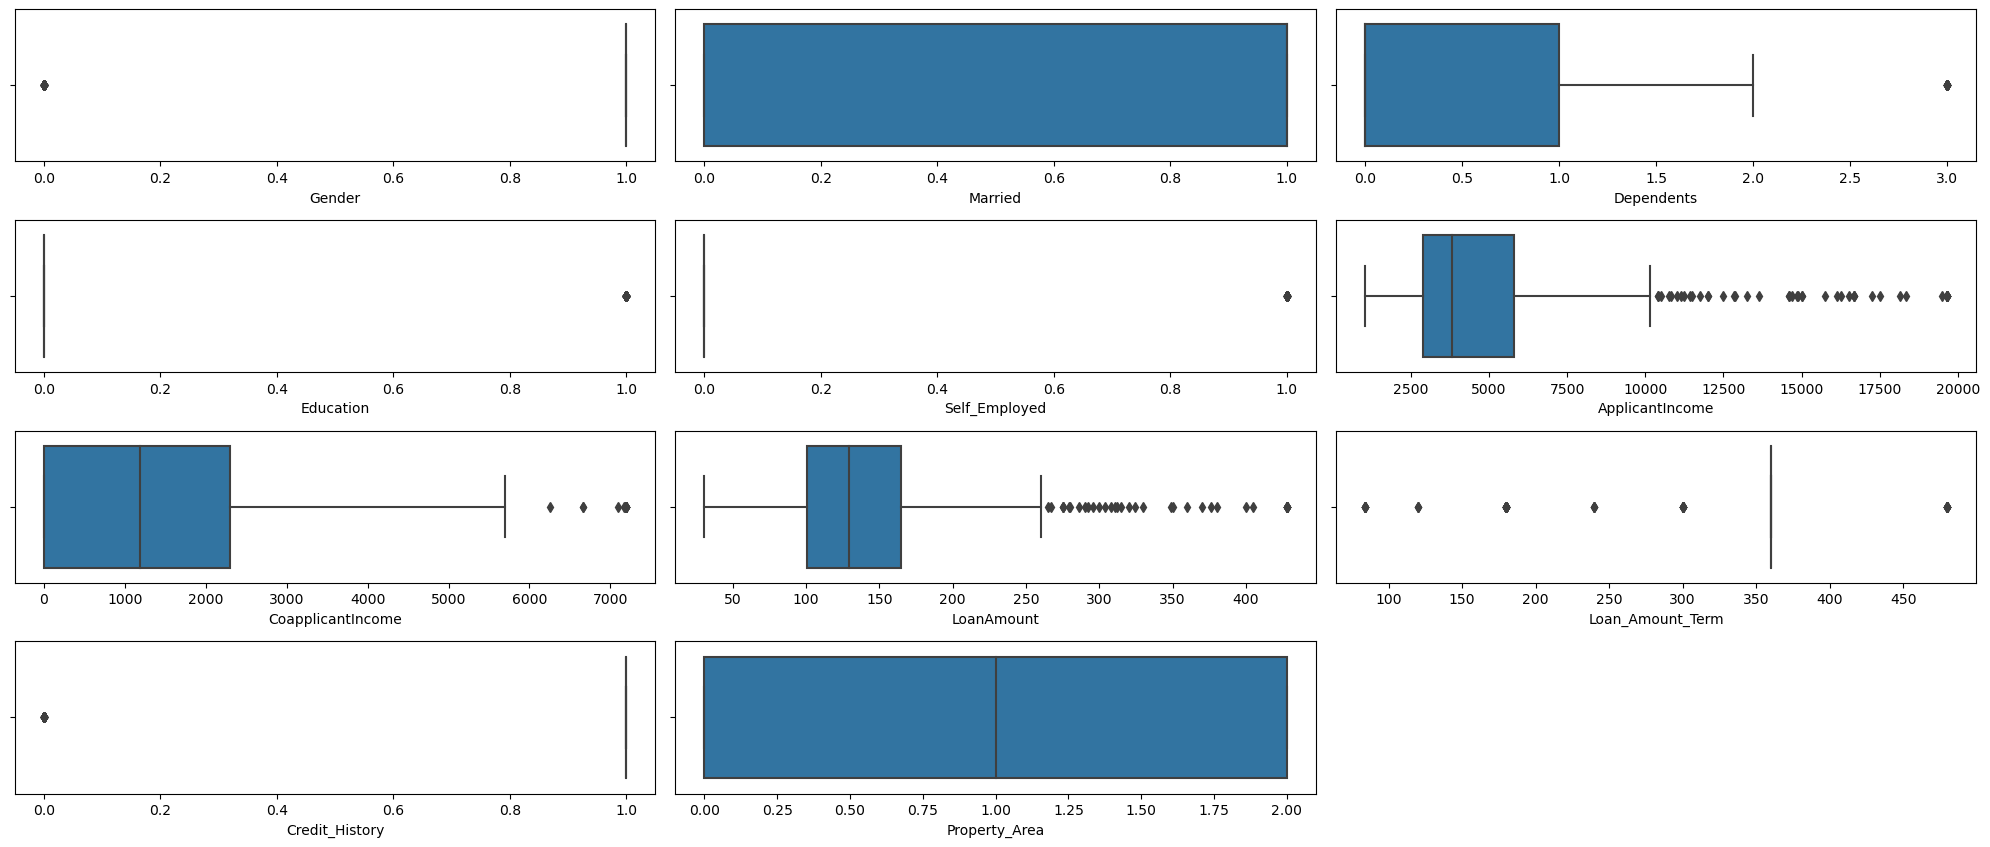

In [37]:
#checking outliers after removal
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(0,len(X_val)):
  plt.subplot(12,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

Remarks: We can see that many outliers are removed.

## Multivariate Analysis:

<AxesSubplot:>

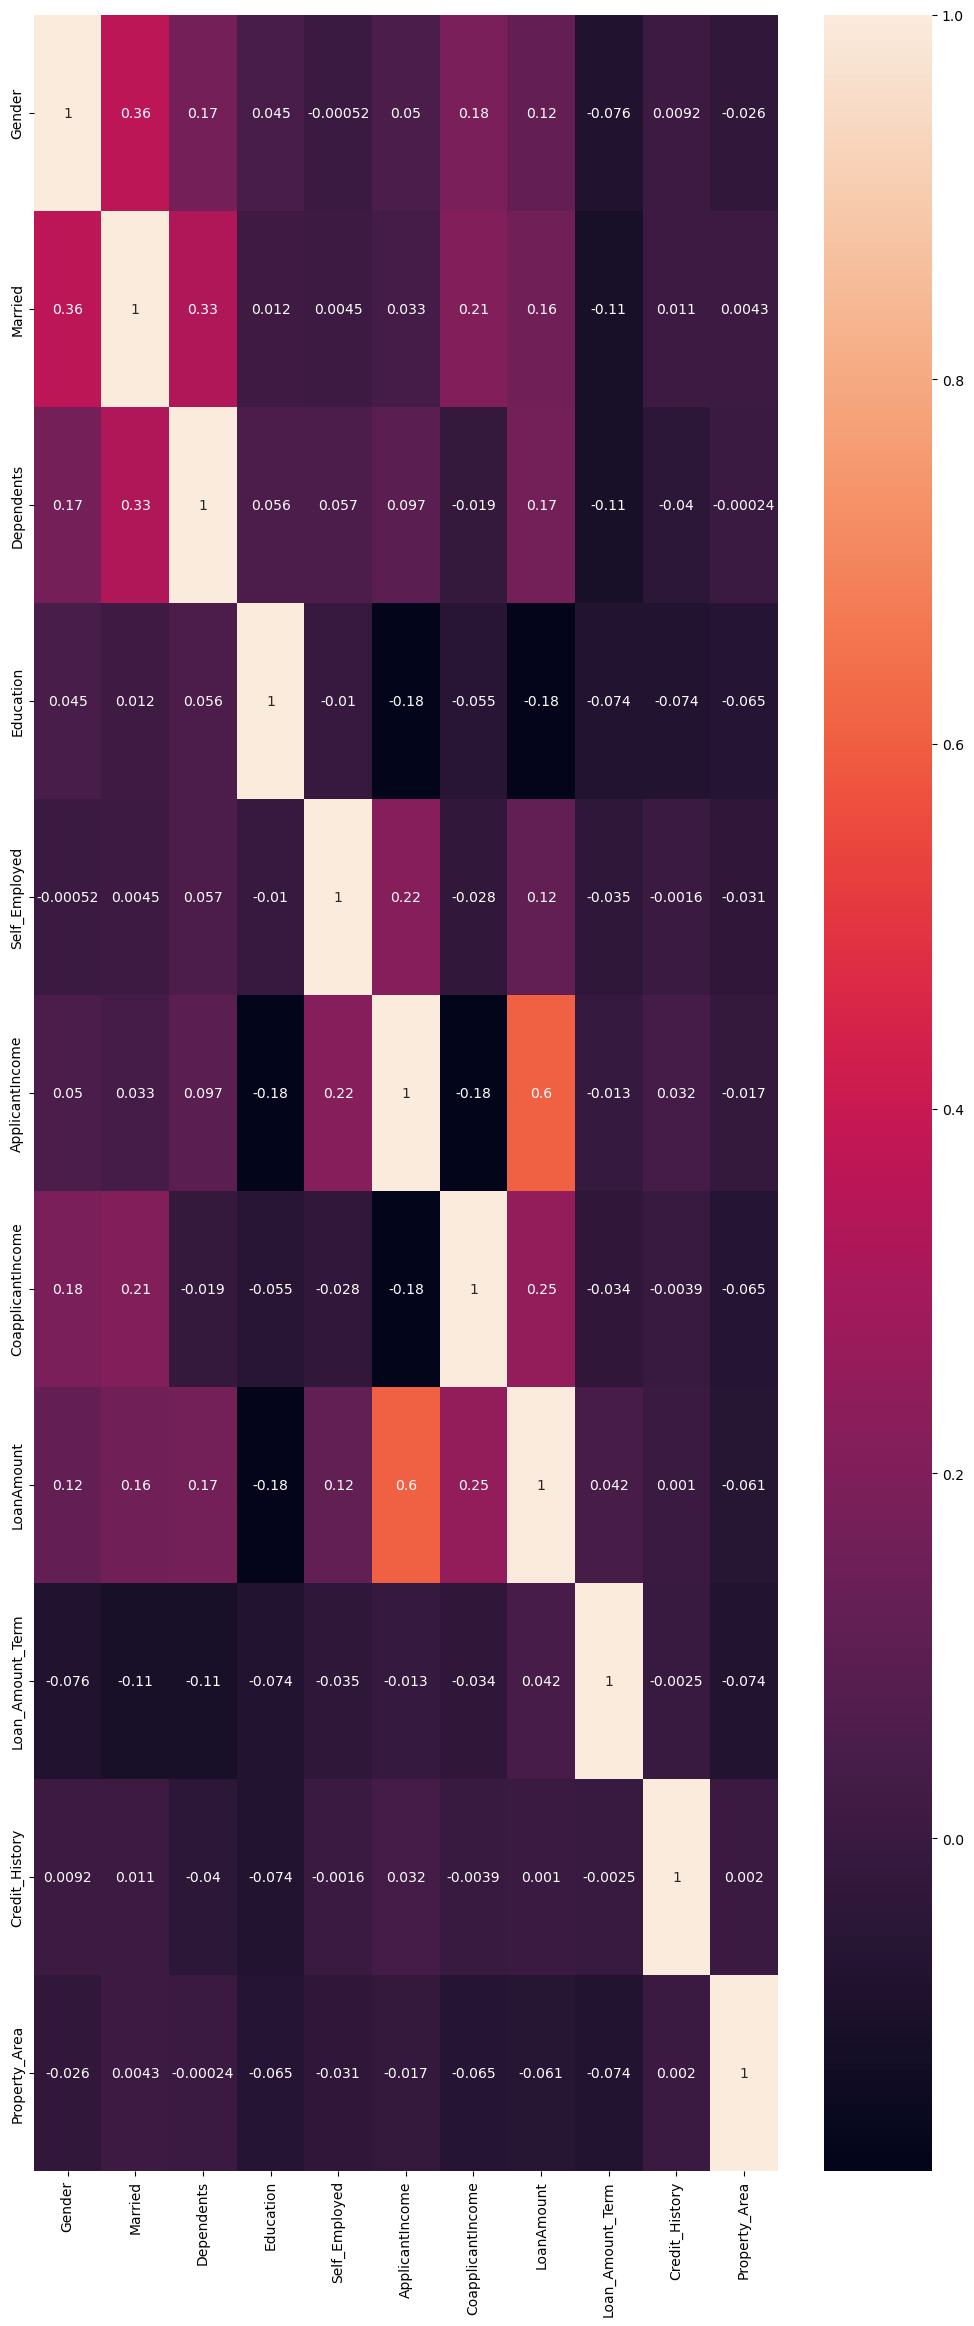

In [38]:
#Checking correlation with the help of heatmap

plt.figure(figsize=(12,28))
X_corr=X.corr()
sns.heatmap(X_corr,annot=True)

Observation: From heatmap above we see that there are some columns that have good correlation like applicantincome, loanamount,married and there are some columns that have less correlation.

## Balancing the data:

In [39]:
smote = SMOTE(random_state= 42)
X_res,y_res = smote.fit_resample(X,y)
X_new = pd.DataFrame(X_res,columns=x.columns)
y_new = pd.DataFrame(y_res,columns=['Loan_Status'])

Text(0.5, 1.0, 'Balanced Data')

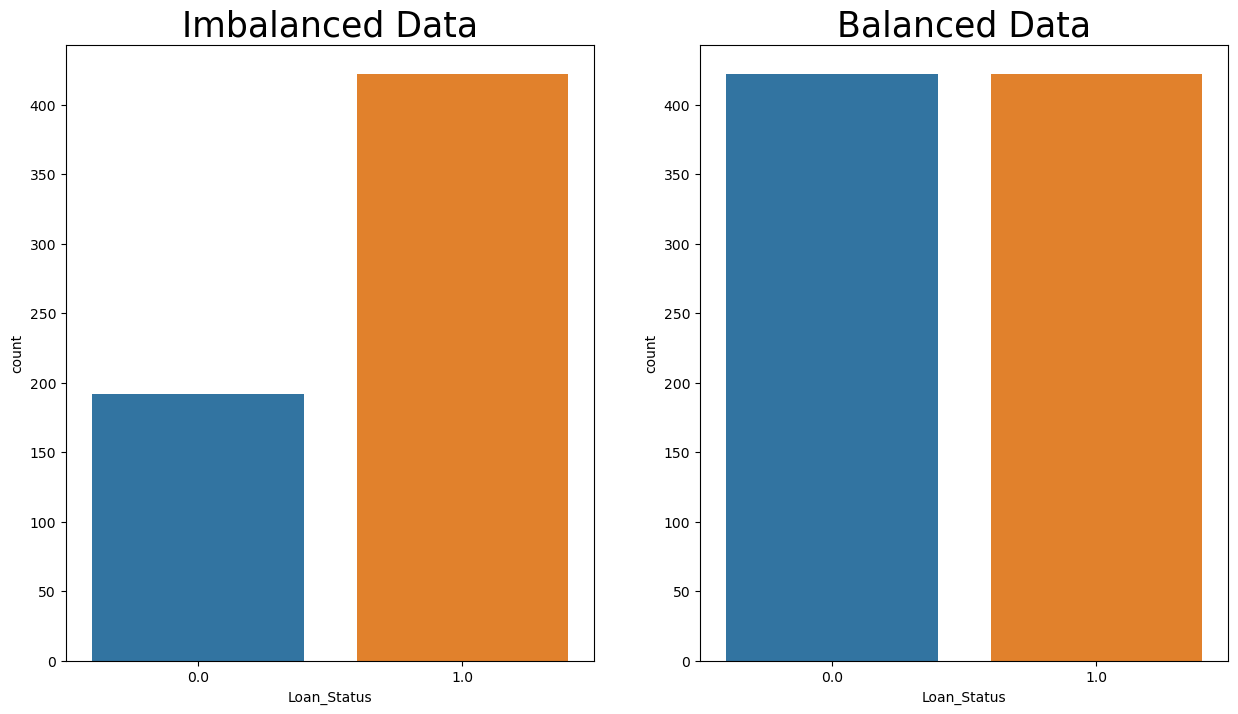

In [40]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y)
plt.title("Imbalanced Data",fontsize=25)
plt.subplot(1,2,2)
sns.countplot(y_new['Loan_Status'])
plt.title("Balanced Data",fontsize=25)

## 

## Checking Skewness:

In [41]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Remarks: We see that there is skewness in our data.

## Removing skewness:

In [44]:
#using power transform method to remove skewness
from sklearn.preprocessing import power_transform

X_new = power_transform(X_new, method='yeo-johnson')
X_new = pd.DataFrame(X_new,columns=x.columns)

In [45]:
#checking skewness after removal
X_new.skew()

Gender              -1.294567
Married             -0.429457
Dependents           0.518731
Education            0.977581
Self_Employed        1.871895
ApplicantIncome     -0.068052
CoapplicantIncome   -0.077047
LoanAmount          -0.029535
Loan_Amount_Term     0.454346
Credit_History      -1.015281
Property_Area       -0.037500
dtype: float64

Remarks: We have successfully reduced skewness from our data

## Feature Scaling:

In [46]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

Remarks: We are scaling the feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value..

## Splitting data for model building using train test split :

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

## Finding the best model:

In [55]:
import scikitplot as skplt

In [56]:
models={
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "ExtraTreesRegressor":ExtraTreesClassifier(),
    "RandomForestRegressor":RandomForestClassifier(),
    "XGBRegressor":XGBClassifier(),
}

*************************************************** GradientBoostingClassifier ************************************************************


Accuracy_Score 0.7952755905511811


SCORE 0.7952755905511811


Confusion metrics


[[ 93  43]
 [  9 109]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.91      0.68      0.78       136
         1.0       0.72      0.92      0.81       118

    accuracy                           0.80       254
   macro avg       0.81      0.80      0.79       254
weighted avg       0.82      0.80      0.79       254

Cross_Val_Score 0.8294096928712313


ROC AUC CURVE


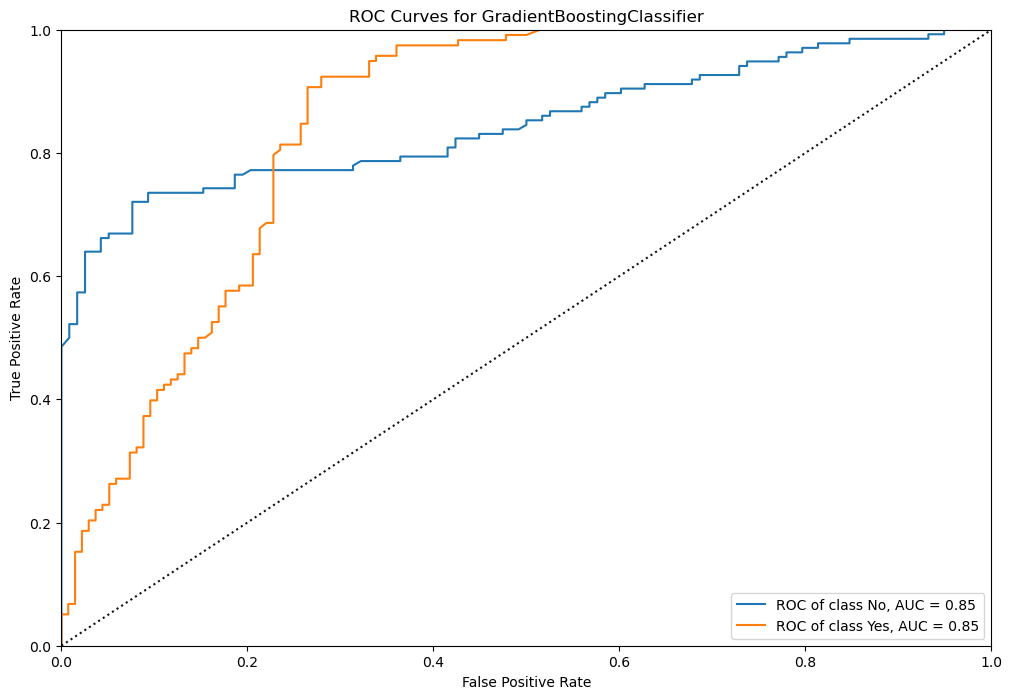

MODEL LEARNING CURVE


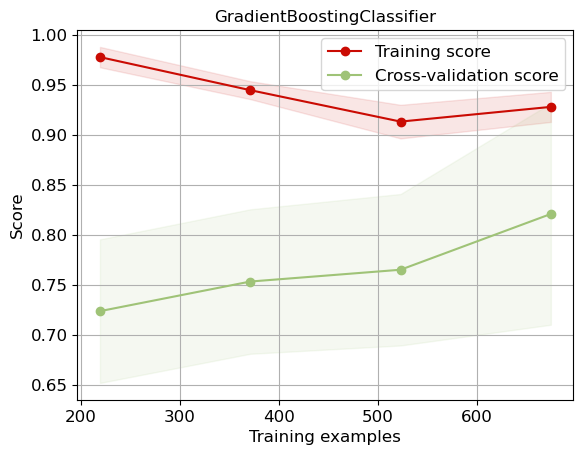

*************************************************** ExtraTreesRegressor ************************************************************


Accuracy_Score 0.7795275590551181


SCORE 0.7795275590551181


Confusion metrics


[[99 37]
 [19 99]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78       136
         1.0       0.73      0.84      0.78       118

    accuracy                           0.78       254
   macro avg       0.78      0.78      0.78       254
weighted avg       0.79      0.78      0.78       254

Cross_Val_Score 0.8281910397295013


ROC AUC CURVE


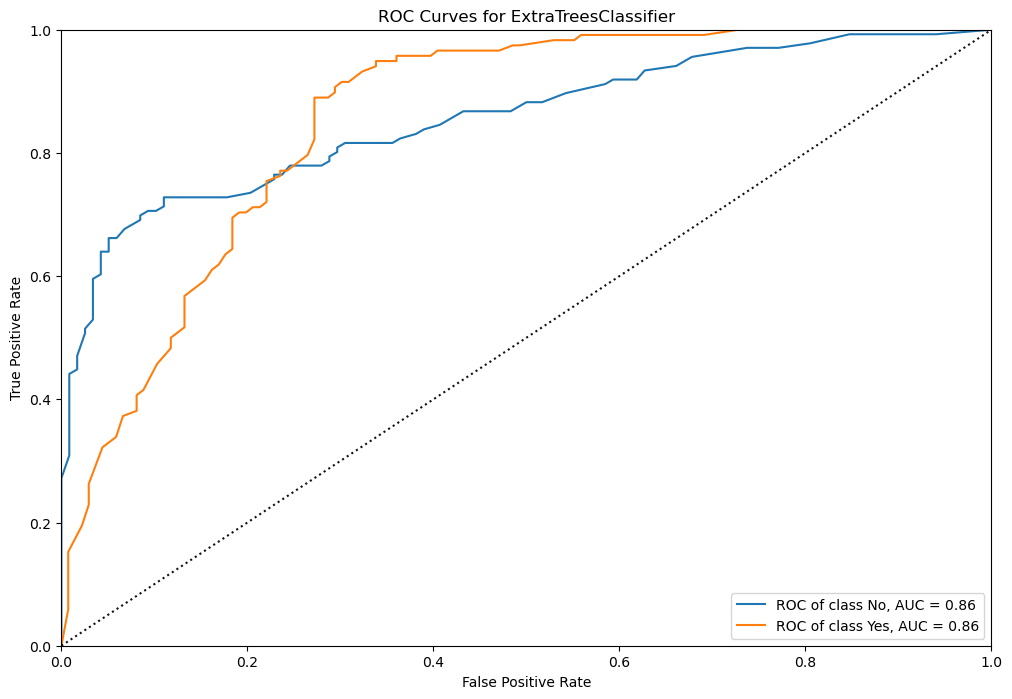

MODEL LEARNING CURVE


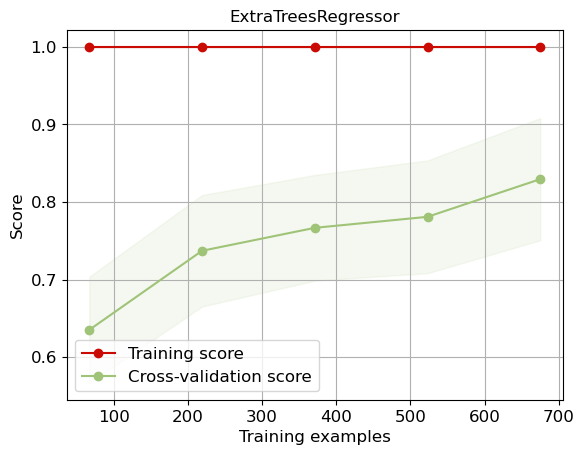

*************************************************** RandomForestRegressor ************************************************************


Accuracy_Score 0.8149606299212598


SCORE 0.8149606299212598


Confusion metrics


[[100  36]
 [ 11 107]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81       136
         1.0       0.75      0.91      0.82       118

    accuracy                           0.81       254
   macro avg       0.82      0.82      0.81       254
weighted avg       0.83      0.81      0.81       254

Cross_Val_Score 0.8412510566356719


ROC AUC CURVE


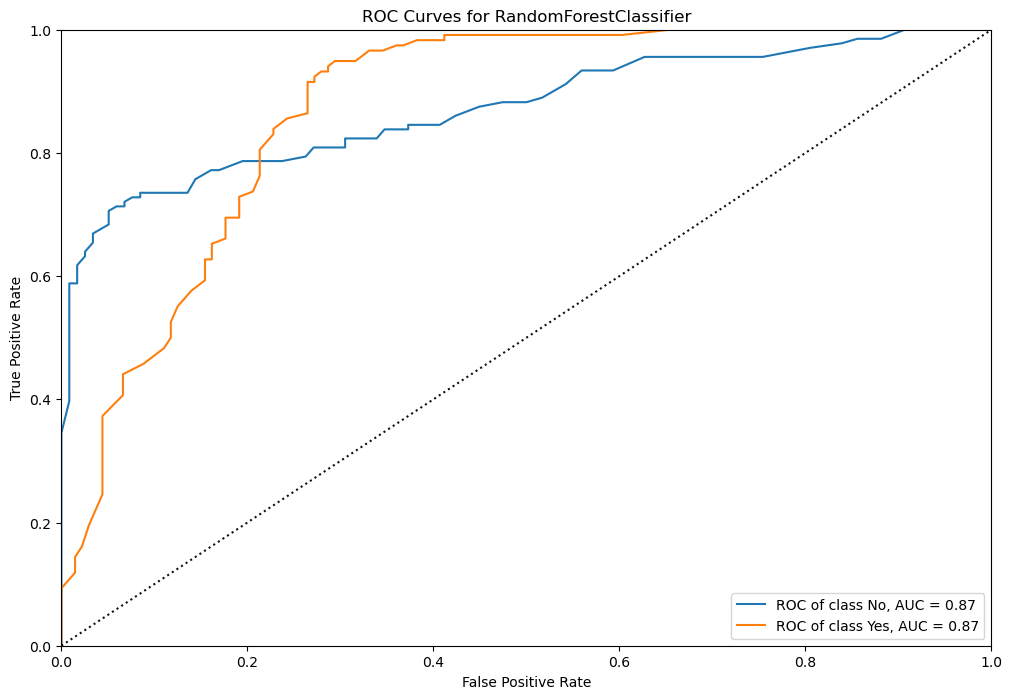

MODEL LEARNING CURVE


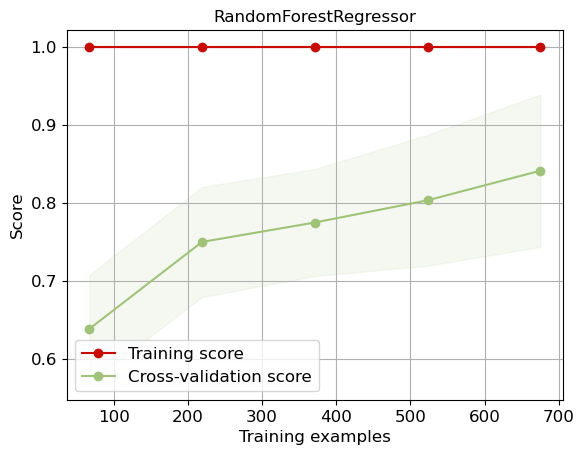

*************************************************** XGBRegressor ************************************************************
[22:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy_Score 0.8070866141732284


SCORE 0.8070866141732284


Confusion metrics


[[103  33]
 [ 16 102]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81       136
         1.0       0.76      0.86      0.81       118

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254

[22:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Sta

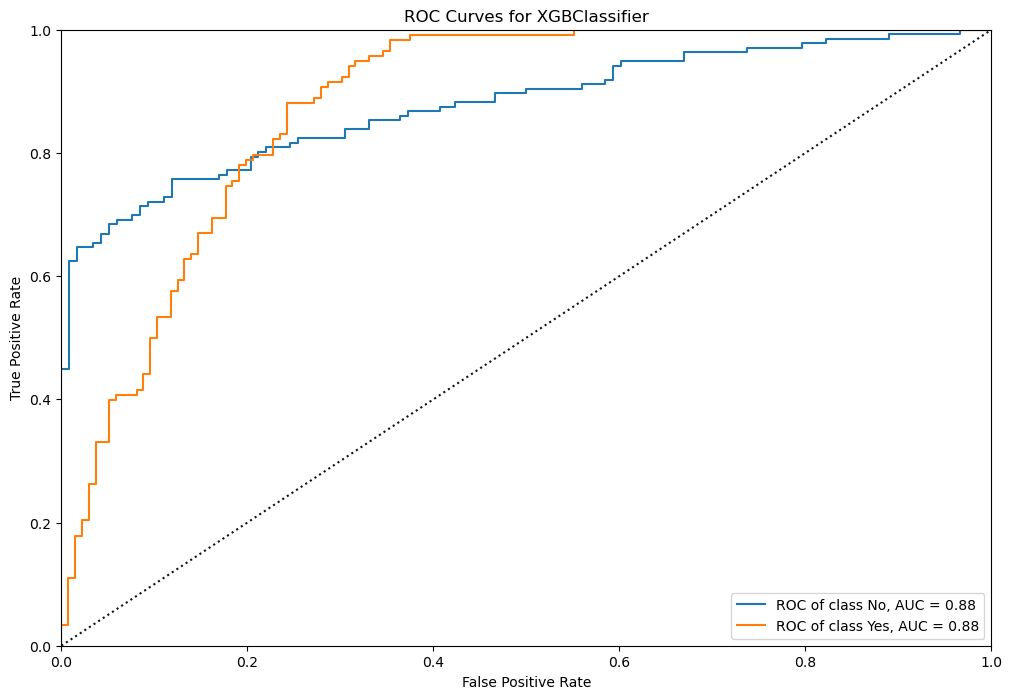

MODEL LEARNING CURVE
[22:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:36:59] WARNING: C:/Users/Administrator/worksp

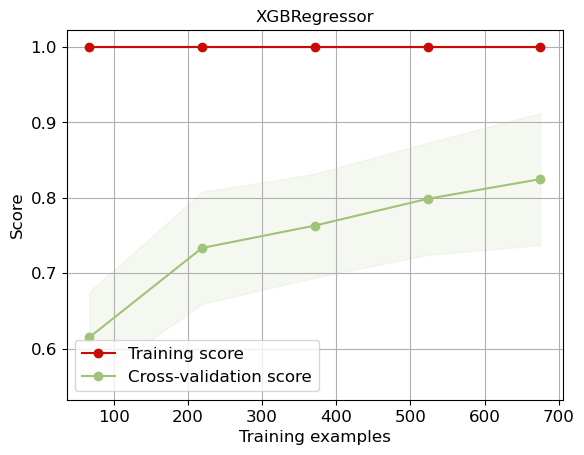

In [57]:
skf=StratifiedKFold(n_splits=5,shuffle=True) #using stratifiedkfold here because it selects all classes at equal level
Score=[]
CVS=[]
MODEL=[]
for name,model in models.items():
  print("***************************************************",name,"************************************************************")
  MODEL.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n')
  ac=accuracy_score(y_test,y_pred)
  Score.append(ac)
  print("Accuracy_Score",ac)
  print('\n')
  print("SCORE",model.score(X_test,y_test))
  print("\n")
  cm=confusion_matrix(y_test,y_pred)
  print('Confusion metrics')
  print('\n')
  print(cm)
  print("CLASSIFICATION REPORT")
  report=classification_report(y_test,y_pred)
  print('\n')
  print(report)
  csv=cross_val_score(model,X_new,y_new,cv=skf).mean()
  CVS.append(csv*100)
  print("Cross_Val_Score",csv)
  print('\n')
  print("ROC AUC CURVE")
  plt.figure(figsize=(12,8))
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['No','Yes'],micro=False,macro=False)
  print("MODEL LEARNING CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
  plt.show()

## Remarks:

We are selecting RandomForestClassifier as our best model since it is giving good cross_val_score of 0.84 as compared to other models

In [58]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Hyperparameter tuning our best ML model:

In [60]:
param={'bootstrap': [True,False],
 'criterion': ['gini','entropy'],
 'max_depth': [None,1,2,3],
 'max_features': ['auto','sqrt','log2'],
 'max_samples': [None,1,2],
 'min_samples_leaf': [1,2],
 'min_samples_split': [2,1,3]
}

In [61]:
Grid=GridSearchCV(estimator=rf,param_grid=param,cv=skf,n_jobs=-1)

Remarks: Using the Grid Search CV method for hyperparameter tuning of the best model.

In [62]:
Grid.fit(X_new,y_new)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [None, 1, 2],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 1, 3]})

## Remarks: We have trained the Grid Search CV with the list of parameters we think it should check for best possible outcomes.

In [63]:
Grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [64]:
Grid.best_score_

0.8531135531135531

## Remarks:

After successfully incorporating the Hyper Parameter Tuning on the Final Model we received the accuracy score for it i.e., 85.78% which was previously 84%.

In [65]:
RF=RandomForestClassifier(bootstrap= True,
 criterion= 'entropy',
 max_depth= None,
 max_features= 'sqrt',
 max_samples= None,
 min_samples_leaf= 2,
 min_samples_split= 2)

Remarks: In the above cell, we have put all the values of grid in randomforest to plot roc_auc and to see learning curve.

ROC AUC CURVE


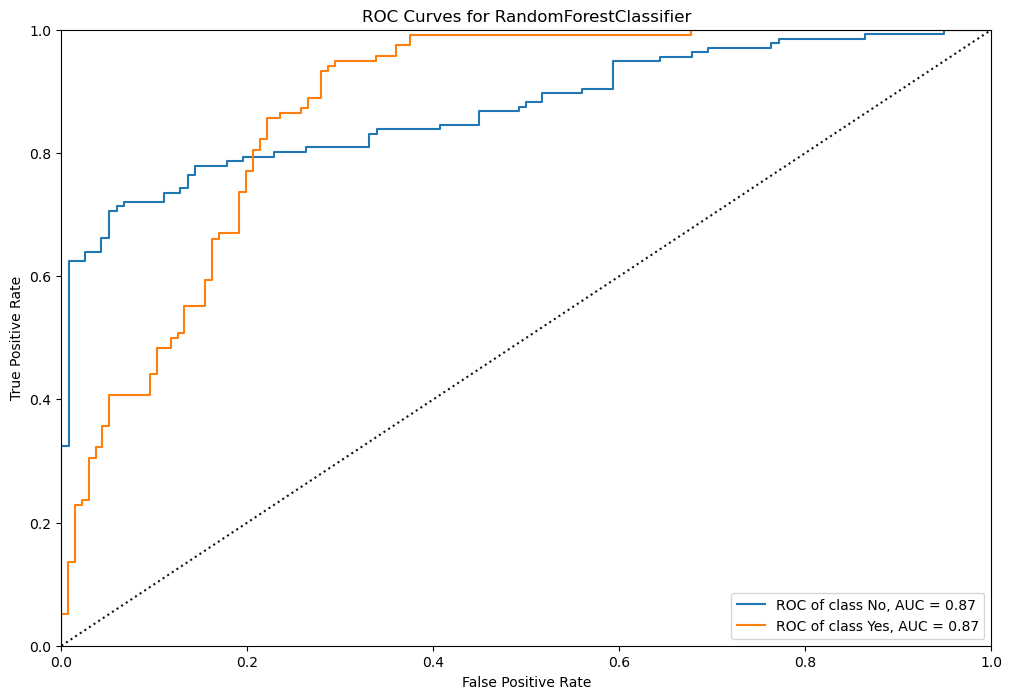

MODEL LEARNING CURVE


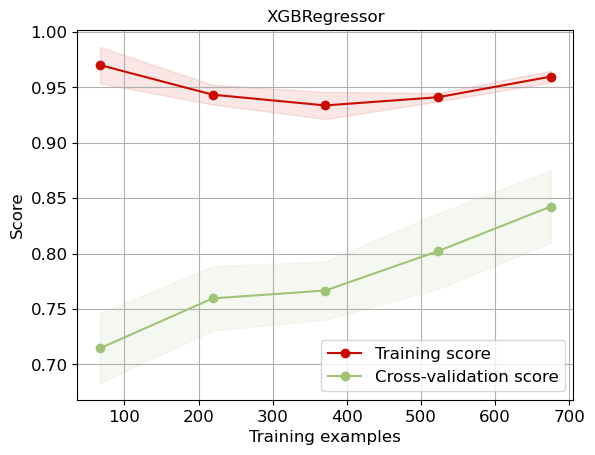

In [66]:
print("ROC AUC CURVE")
plt.figure(figsize=(12,8))
roc_auc(RF,X_train,y_train,X_test=X_test,y_test=y_test,classes=['No','Yes'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(RF,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
plt.show()

Remarks: We have generated the ROC Curve for the final model and it shows the AUC score for the final model to be of 87% for both Yes or No class.

## Final Model Metrics:

In [67]:
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print("Accuracy_score",accuracy_score(y_test,y_pred))
print("Confusion Matrics")
print('\n')
print(confusion_matrix(y_test,y_pred))
print("Classification Report")
print('\n')
print(classification_report(y_test,y_pred))

Accuracy_score 0.8110236220472441
Confusion Matrics


[[ 95  41]
 [  7 111]]
Classification Report


              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80       136
         1.0       0.73      0.94      0.82       118

    accuracy                           0.81       254
   macro avg       0.83      0.82      0.81       254
weighted avg       0.84      0.81      0.81       254



## Saving the model:

In [69]:
import joblib
joblib.dump(Grid,'Loan_Classification_Model.obj')

['Loan_Classification_Model.obj']

## Loading the model:

In [70]:
model=joblib.load('Loan_Classification_Model.obj')

In [71]:
model.predict(X_test)

array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1.

## Conclusion:

1. In the given dataset, we were required to build a model that can predict the the loan_status like loan should be approved or not.
2. After some initial data analysis, we performed EDA to understand the effect of features on the target column and to understand other related important things
3. The data was imbalanced so to balance it, we used upsampling SMOTE method.
4. The dataset was very small. If the dataset was large, we could have learn more about the model and accuracy might have increased.
5. In the end, we build a ML model i.e., RandomForestClassifier that was able predict loan status with 85.78% accuracy.